# MAIN


## Preliminaries
This section contains the boilerplate necessary for the other sections. Run it first.

In [2]:
import math

from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import ipywidgets as widgets
from IPython.display import display, clear_output

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
torch.set_grad_enabled(False);
import pandas as pd

In [156]:
import imageio
import numpy as np
import h5py

h5_file = h5py.File("/content/mros-visit1-aa0100.h5", 'r')

In [189]:
h5_file.keys()

<KeysViewHDF5 ['data', 'events', 'stages']>

In [158]:
data_ds = h5_file['data']
events_ds = h5_file['events']
stages_ds = h5_file['stages']


## H5->Data

In [160]:
data_ds.keys()

<KeysViewHDF5 ['channel_idx', 'fs', 'fs_orig', 'scaled']>

In [161]:
data_channel_idx_df = data_ds['channel_idx']
data_fs_df = data_ds['fs']
data_fs_orig_df = data_ds['fs_orig']
data_scaled_df = data_ds['scaled']

In [165]:
data_df = pd.DataFrame() # for some reason it does not become a dataframe, problem is solved after Stages section
#data_df['channel_idx'] = pd.DataFrame(data=data_channel_idx_df)
#data_df['fs'] = pd.DataFrame(data=data_fs_df)
#data_df['fs_orig'] = pd.DataFrame(data=data_fs_orig_df)
#data_df['scaled'] = pd.DataFrame(data=data_scaled_df)

In [166]:
data_df # empty, solved below stages section

""


## H5->Events

In [167]:
events_ds.keys()

<KeysViewHDF5 ['lm']>

In [168]:
events_lm_df = events_ds['lm']

In [169]:
events_lm_df.keys()

<KeysViewHDF5 ['duration', 'start']>

In [170]:
events_lm_duration_df = events_lm_df['duration']
events_lm_start_df = events_lm_df['start']

In [172]:
events_df = pd.DataFrame()
events_df['duration'] = pd.DataFrame(data=events_lm_duration_df)
events_df['start'] = pd.DataFrame(data=events_lm_start_df)

In [108]:
events_df

,duration,start
0,0.7,20.8
1,4.5,26.3
2,1.7,29.6
3,3.6,69.1
4,7.8,119.2
...,...,...
554,8.6,31343.9
555,8.1,31344.6
556,1.4,31382.3
557,2.8,31388.1


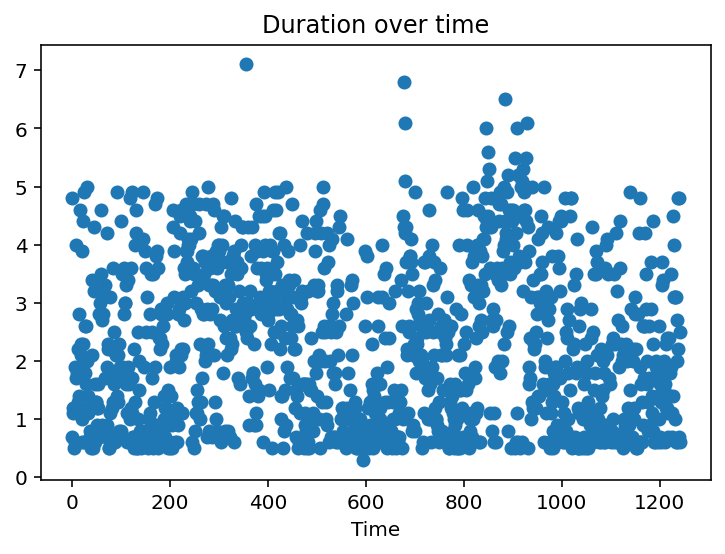

In [219]:
plt.scatter(events_df.index, events_df.duration)
plt.title("Duration over time")
plt.xlabel("Time")
plt.show()

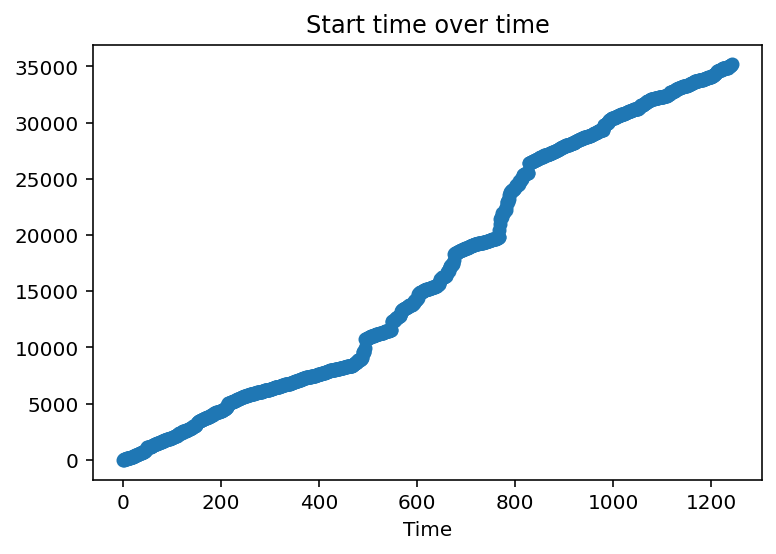

In [218]:
plt.scatter(events_df.index, events_df.start)
plt.title("Start time over time")
plt.xlabel("Time")
plt.show()

## H5->stages

In [110]:
stages_df = pd.DataFrame()
stages_df['stages'] = pd.DataFrame(data=stages_ds)

In [237]:
stages_df[10000:10010]

,stages
10000,2
10001,2
10002,2
10003,2
10004,2
10005,2
10006,2
10007,2
10008,2
10009,2


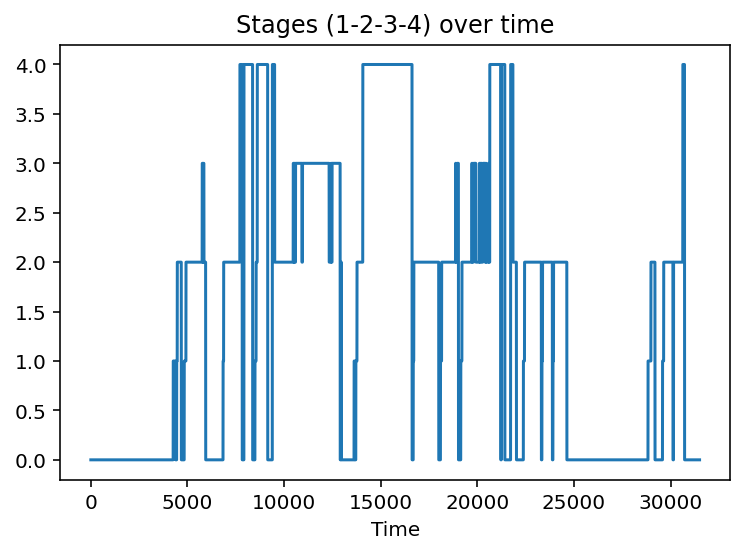

In [232]:
stages_df.stages.plot()
plt.title("Stages (1-2-3-4) over time")
plt.xlabel("Time")
plt.show()

## Array representation, all data

In [236]:
data = h5py.File('/content/mros-visit1-aa0001.h5', 'r')['data/scaled'][:]
print("SHAPE: ", data.shape)
print("\n\"mros-visit1-aa0001.h5\": Name of the recording (Rec 1)")
print("116: number of segments (or sample) in a recording (they overlap by 5 mins), depends on the recording")
print("2: number of  channels")
print("38400: number of items in one segment")
print("Total time of the recording: 116*5+5= 580mins = 9.7 hours")
print("\nData:")
data

SHAPE:  (104, 2, 38400)

"mros-visit1-aa0001.h5": Name of the recording (Rec 1)
116: number of segments (or sample) in a recording (they overlap by 5 mins), depends on the recording
2: number of  channels
38400: number of items in one segment
Total time of the recording: 116*5+5= 580mins = 9.7 hours

Data:


array([[[ 1.0645336e-04,  1.0645336e-04,  1.0645336e-04, ...,
          1.3933164e+00, -6.5122020e-01,  2.3424191e-02],
        [ 6.5282168e-04,  6.5282168e-04,  6.5282168e-04, ...,
         -2.1046572e+00,  3.7498872e+00,  3.5164857e+00]],

       [[ 2.6770514e-01, -5.6945801e-01,  5.3985852e-01, ...,
         -1.3326713e+00,  7.9157567e+00, -1.1620175e+00],
        [ 8.9293736e-01, -8.8303208e-01,  4.4338116e-01, ...,
         -1.2294136e+01, -5.3201323e+00,  1.1224005e+01]],

       [[-1.1499962e+00, -3.8980763e+00,  5.0224733e+00, ...,
          3.4136581e-01, -6.9837630e-01,  4.7500375e-01],
        [ 3.1979432e+00, -3.2571657e+00, -4.2717915e+00, ...,
         -5.5920374e-01, -6.8888468e-01,  7.1620440e-01]],

       ...,

       [[-9.2381555e-01, -6.0879475e-01, -3.1348494e-01, ...,
         -1.6652376e+01, -4.5774875e+00, -1.8901333e+00],
        [-1.0341345e+00, -6.8596995e-04,  1.1496303e+00, ...,
          8.2309771e+00,  2.8400865e+00, -8.8183680e+00]],

       [[-1.5910785